<a href="https://colab.research.google.com/github/Anish-S-tech/my-ml-journey/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Time series analysis - information collected in sequence over time. It shows how things change at different points, like stock prices every day or temperature every hour.

In [ ]:
# Step 1 - Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Step 2: Loading the data

df = pd.read_csv('/content/stock_data.csv',parse_dates=True,index_col="Date")
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [ ]:
# Step 3: Cleaning the data

df.drop(columns="Unnamed: 0",inplace=True) # Removes the Null valued row
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


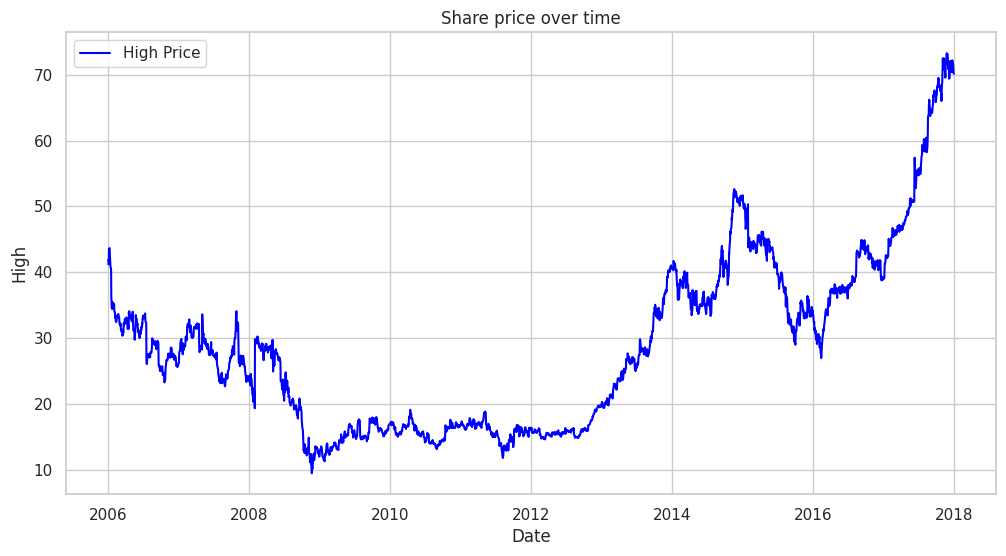

In [ ]:
# Step 4: Plotting high stock prices

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Date',y='High',label='High Price',color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share price over time')

plt.show()

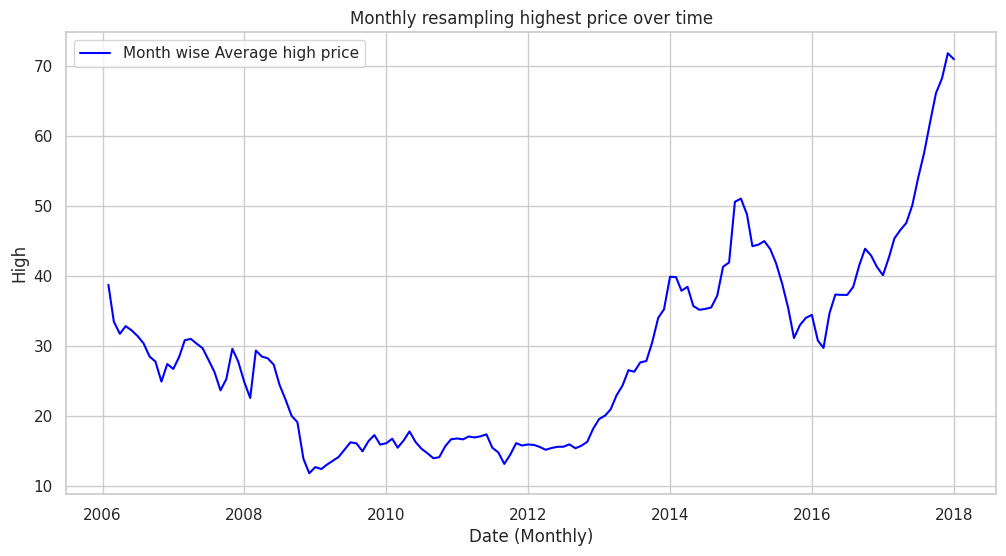

In [ ]:
# Step 5: Resampling the data

df_resampled = df.resample('ME').mean(numeric_only = True)  # Groups the data by month(M) and the data at end of month(E) is month's value (ME)

sns.set(style = "whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=df_resampled,x="Date",y="High",label="Month wise Average high price",color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly resampling highest price over time')

plt.show()


Date is already the index or not present in the dataframe


<Figure size 1200x600 with 0 Axes>

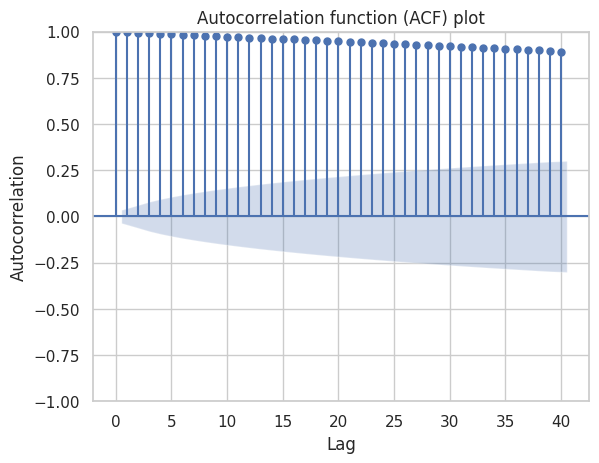

In [ ]:
# Step 6: Detecting seasonality with autocorrelation

if 'Date' not in df.columns:
  print("Date is already the index or not present in the dataframe")

else:
  df.set_index("Date",inplace=True)

plt.figure(figsize=(12,6))
plot_acf(df['High'],lags=40)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation function (ACF) plot')
plt.show()

In [ ]:
# Step 7: Detecting stationarity with ADF test (ADF = Augmented Dickey Fuller test)

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])
print("ADF statistic:", result[0])
print('p-value:',result[1])
print('Critical values:', result[4])


ADF statistic: 0.7671404880535936
p-value: 0.9910868050318213
Critical values: {'1%': np.float64(-3.4325316347197403), '5%': np.float64(-2.862503905260741), '10%': np.float64(-2.5672831121111113)}


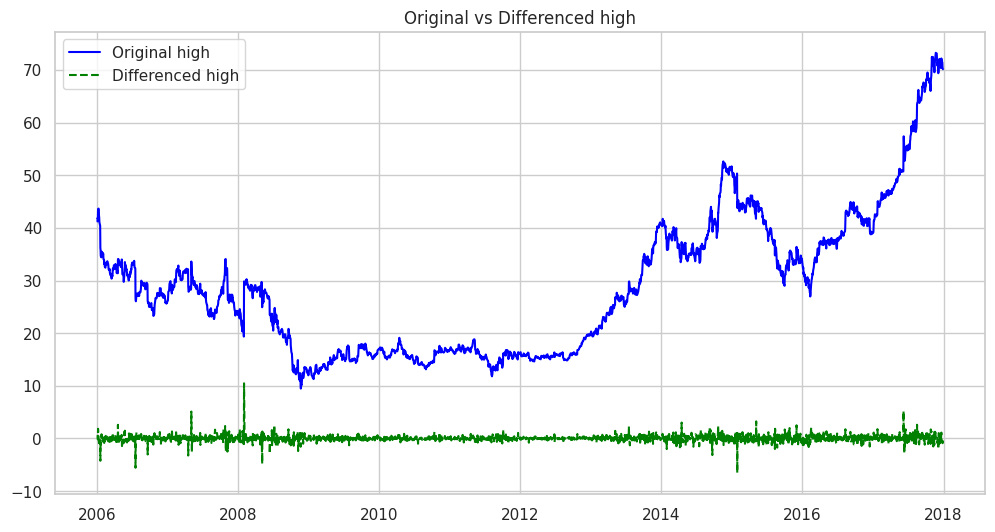

In [ ]:
# Step 8: Differencing to achieve stationarity

df['high_diff'] = df['High'].diff()  # df['High'].diff(): helps in calculating the difference between consecutive values in the High column.

plt.figure(figsize=(12,6))
plt.plot(df['High'],label='Original high',color='blue')
plt.plot(df['high_diff'],label='Differenced high',linestyle='--',color='green')
plt.legend()
plt.title("Original vs Differenced high")
plt.show()

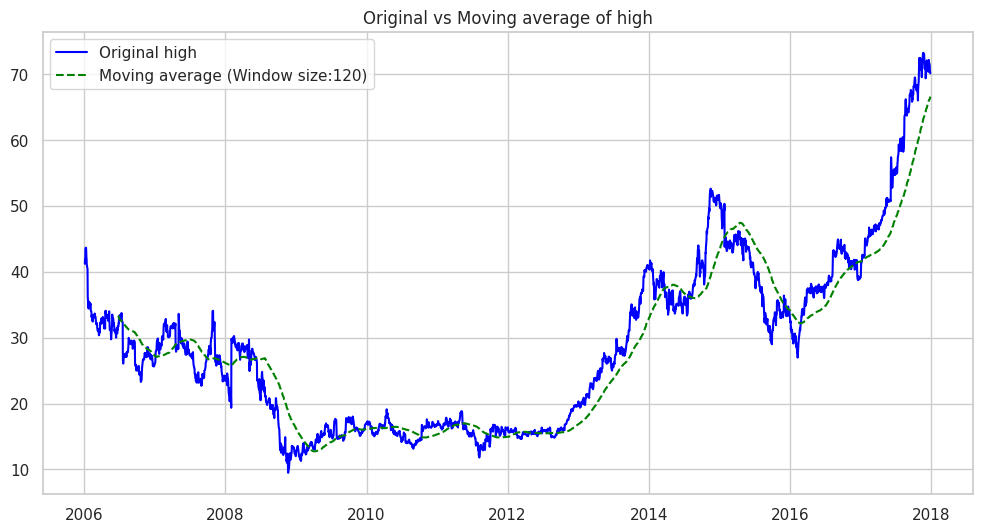

In [ ]:
# Step 9: Smoothing data with moving average

window_size=120
df['High_diff'] = df['High'].rolling(window = window_size).mean()

plt.figure(figsize=(12,6))

plt.plot(df['High'],label="Original high",color='blue')
plt.plot(df['High_diff'],label=f"Moving average (Window size:{window_size})",linestyle='--',color='green')

plt.legend()
plt.title('Original vs Moving average of high')
plt.show()

In [ ]:
# Step 10: Original vs Differenced data (combining)

df_combined = pd.concat([df['High'],df['high_diff']],axis=1) # First value always null because no other values before to subtract with the current value

display(df_combined)

,High,high_diff
Date,,
2006-01-03,41.22,NaN
2006-01-04,41.90,0.68
2006-01-05,41.73,-0.17
2006-01-06,43.57,1.84
2006-01-09,43.66,0.09
...,...,...
2017-12-22,71.87,-0.30
2017-12-26,71.39,-0.48
2017-12-27,70.49,-0.90


In [ ]:
# Getting the differenced value alone

df.dropna(subset=['high_diff'],inplace=True)
df['high_diff'].head()

,high_diff
Date,
2006-01-04,0.68
2006-01-05,-0.17
2006-01-06,1.84
2006-01-09,0.09
2006-01-10,-0.32


In [ ]:
# Perform ADF test on differenced data i.e, high_diff

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['high_diff'])
print('ADF statistic:',result[0])
print('p-value:',result[1])
print('Critical values:',result[4])

ADF statistic: -12.14836747834324
p-value: 1.5912766134149499e-22
Critical values: {'1%': np.float64(-3.4325316347197403), '5%': np.float64(-2.862503905260741), '10%': np.float64(-2.5672831121111113)}


In [ ]:
# Since p-value < ADF test's value, let's reject the null hypothesis and conclude that we don't have enough evidence to
# accept the null hypothesis